# LA Metro Bus EDA and Visualization
We have a cleaned dataset (which was gathered with the LA Metro API), so let's analyze it

## Introduction

In [9]:
import pandas as pd
import io
from PIL import Image, ImageDraw, ImageFont
import matplotlib
import folium
import os
from matplotlib import pyplot as plt
from folium.plugins import HeatMap
import glob
from natsort import natsorted, ns
from PIL import Image
%matplotlib inline

In [10]:
bus_df = pd.read_csv("../Bus Data/[Cleaned] LA Metro Bus Data.csv")
bus_df

grouped time                 actual time  last report  \
0       2020-07-16 08:54:29.410523  2020-07-16 08:54:30.605064            8   
1       2020-07-16 08:54:29.410523  2020-07-16 08:54:30.786010            8   
2       2020-07-16 08:54:29.410523  2020-07-16 08:54:30.957790            8   
3       2020-07-16 08:54:29.410523  2020-07-16 08:54:31.153969          125   
4       2020-07-16 08:54:29.410523  2020-07-16 08:54:31.334927           37   
...                            ...                         ...          ...   
499872  2020-07-22 18:43:29.161669  2020-07-22 18:47:54.623953          182   
499873  2020-07-22 18:43:29.161669  2020-07-22 18:47:54.900232           18   
499874  2020-07-22 18:43:29.161669  2020-07-22 18:47:55.200471           44   
499875  2020-07-22 18:43:29.161669  2020-07-22 18:47:55.488402           44   
499876  2020-07-22 18:43:29.161669  2020-07-22 18:47:55.768894           45   

          id  route   latitude   longitude  \
0       1600  794.0  34.033451 -118.264847   
1       4140  268.0  34.148680 -118.080071   
2       4171   70.0  34.052975 -118.249674   
3       4061  705.0  34.003990 -118.227187   
4       9567  108.0  33.972591 -118.113319   
...      ...    ...        ...         ...   
499872  3945   14.0  34.076046 -118.359283   
499873  3997   94.0  34.223754 -118.375764   
499874  8592  166.0  34.249901 -118.606163   
499875  1716   53.0  33.934093 -118.254295   
499876  4135    4.0  34.077835 -118.262812   

                                            run  hour direction        day  
0                       North to Sylmar Station     8     North   Thursday  
1                     South to El Monte Station     8     South   Thursday  
2                      East to El Monte Station     8      East   Thursday  
3                       North to West Hollywood     8     North   Thursday  
4                        West to Marina Del Rey     8      West   Thursday  
...                                         ...   ...       ...        ...  
499872  South to Washington/Fairfax Transit Hub    18     South  Wednesday  
499873                  North to Sylmar Station    18     North  Wednesday  
499874                       East to Sun Valley    18      East  Wednesday  
499875                  South to Avalon Station    18     South  Wednesday  
499876                     West to Santa Monica    18      West  Wednesday  

[499877 rows x 11 columns]

Here is our dataset. Below, I will see which day has the most amount of data.

Friday       127737
Saturday     121263
Wednesday    101371
Monday        77025
Thursday      72481
Name: day, dtype: int64


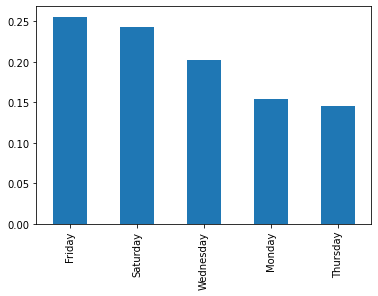

In [11]:
print(bus_df["day"].value_counts())
bus_df["day"].value_counts(normalize = True).plot.bar()

Above, I can see that the most data avaialble on a given data was Friday. So, let's isolate the data and analyze it.

In [12]:
bus_friday_df = bus_df
indexFriday = bus_friday_df[bus_friday_df["day"] != "Friday"].index
bus_friday_df.drop(indexFriday, inplace = True)
bus_friday_df

#df.drop(df[df['Age'] < 25].index, inplace = True) 

grouped time                 actual time  last report  \
72481   2020-07-17 08:23:19.861679  2020-07-17 08:23:20.082148          202   
72482   2020-07-17 08:23:19.861679  2020-07-17 08:23:20.263623           16   
72483   2020-07-17 08:23:19.861679  2020-07-17 08:23:20.445480           43   
72484   2020-07-17 08:23:19.861679  2020-07-17 08:23:20.623931           16   
72485   2020-07-17 08:23:19.861679  2020-07-17 08:23:20.808349           16   
...                            ...                         ...          ...   
200213  2020-07-17 18:14:54.725013  2020-07-17 18:21:34.529062           78   
200214  2020-07-17 18:14:54.725013  2020-07-17 18:21:34.711455           25   
200215  2020-07-17 18:14:54.725013  2020-07-17 18:21:34.902544          131   
200216  2020-07-17 18:14:54.725013  2020-07-17 18:21:35.089604           25   
200217  2020-07-17 18:14:54.725013  2020-07-17 18:21:35.267428           25   

          id  route   latitude   longitude                               run  \
72481   3129  607.0  33.959869 -118.353379  Clockwis to N. Inglewood Shuttle   
72482   5914  102.0  34.007691 -118.337026          West to Lax City Bus Ctr   
72483   1600  794.0  34.033424 -118.264451           North to Sylmar Station   
72484   4140  487.0  34.054477 -118.208098               East to Temple City   
72485   8641  115.0  33.953401 -118.197054             West to Playa Del Rey   
...      ...    ...        ...         ...                               ...   
200213  8216  152.0  34.227821 -118.366234      East to N. Hollywood Station   
200214  8715  207.0  33.974921 -118.309060     South to Western-Imperial Hwy   
200215  1708   53.0  33.999077 -118.256454              North to Downtown LA   
200216  6109   51.0  33.960274 -118.265213          South to Compton Station   
200217  9559  207.0  34.101814 -118.309822                North to Hollywood   

        hour direction     day  
72481      8  Clockwis  Friday  
72482      8      West  Friday  
72483      8     North  Friday  
72484      8      East  Friday  
72485      8      West  Friday  
...      ...       ...     ...  
200213    18      East  Friday  
200214    18     South  Friday  
200215    18     North  Friday  
200216    18     South  Friday  
200217    18     North  Friday  

[127737 rows x 11 columns]

Above is the data that was collected on Friday. The data contains 127,737 rows, so there is still a significant amount of data that we can look at.

## EDA

In [13]:
bus_friday_df["direction"].unique()

array(['Clockwis', 'West', 'North', 'East', 'South', 'none', 'Xcounter'],
      dtype=object)

Above are the unique directions that a bus can go.

South       31860
North       31805
East        31610
West        31525
Clockwis      470
Xcounter      398
none           69
Name: direction, dtype: int64


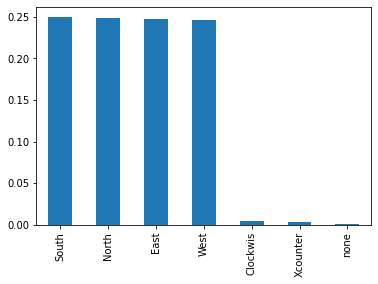

In [14]:
print(bus_friday_df["direction"].value_counts())
bus_friday_df["direction"].value_counts(normalize = True).plot.bar()

Above is a graph that shows the count of data for each direction. As we can see, the main four directions (South, North, East, West) have about an equal amount of data. Clockwis, Xcounter, and none have significanly lower counts.

In [15]:
bus_friday_df["last report"].describe()

count    127737.000000
mean         63.480816
std          62.916032
min           0.000000
25%          16.000000
50%          38.000000
75%          95.000000
max         299.000000
Name: last report, dtype: float64

The last report column in the dataset represents the most recent time that a specific bus updated its information (the location being the most important) to the API. So, from the above, we can see that the average last reporting time was 63 seconds, and at least 75% of the buses had data that was from 93 seconds or earlier.

51.0     3129
16.0     2910
720.0    2298
18.0     2243
28.0     2205
         ... 
665.0     141
126.0     125
128.0      94
202.0      87
607.0      36
Name: route, Length: 132, dtype: int64
51.0     0.024496
16.0     0.022781
720.0    0.017990
18.0     0.017560
28.0     0.017262
           ...   
665.0    0.001104
126.0    0.000979
128.0    0.000736
202.0    0.000681
607.0    0.000282
Name: route, Length: 132, dtype: float64


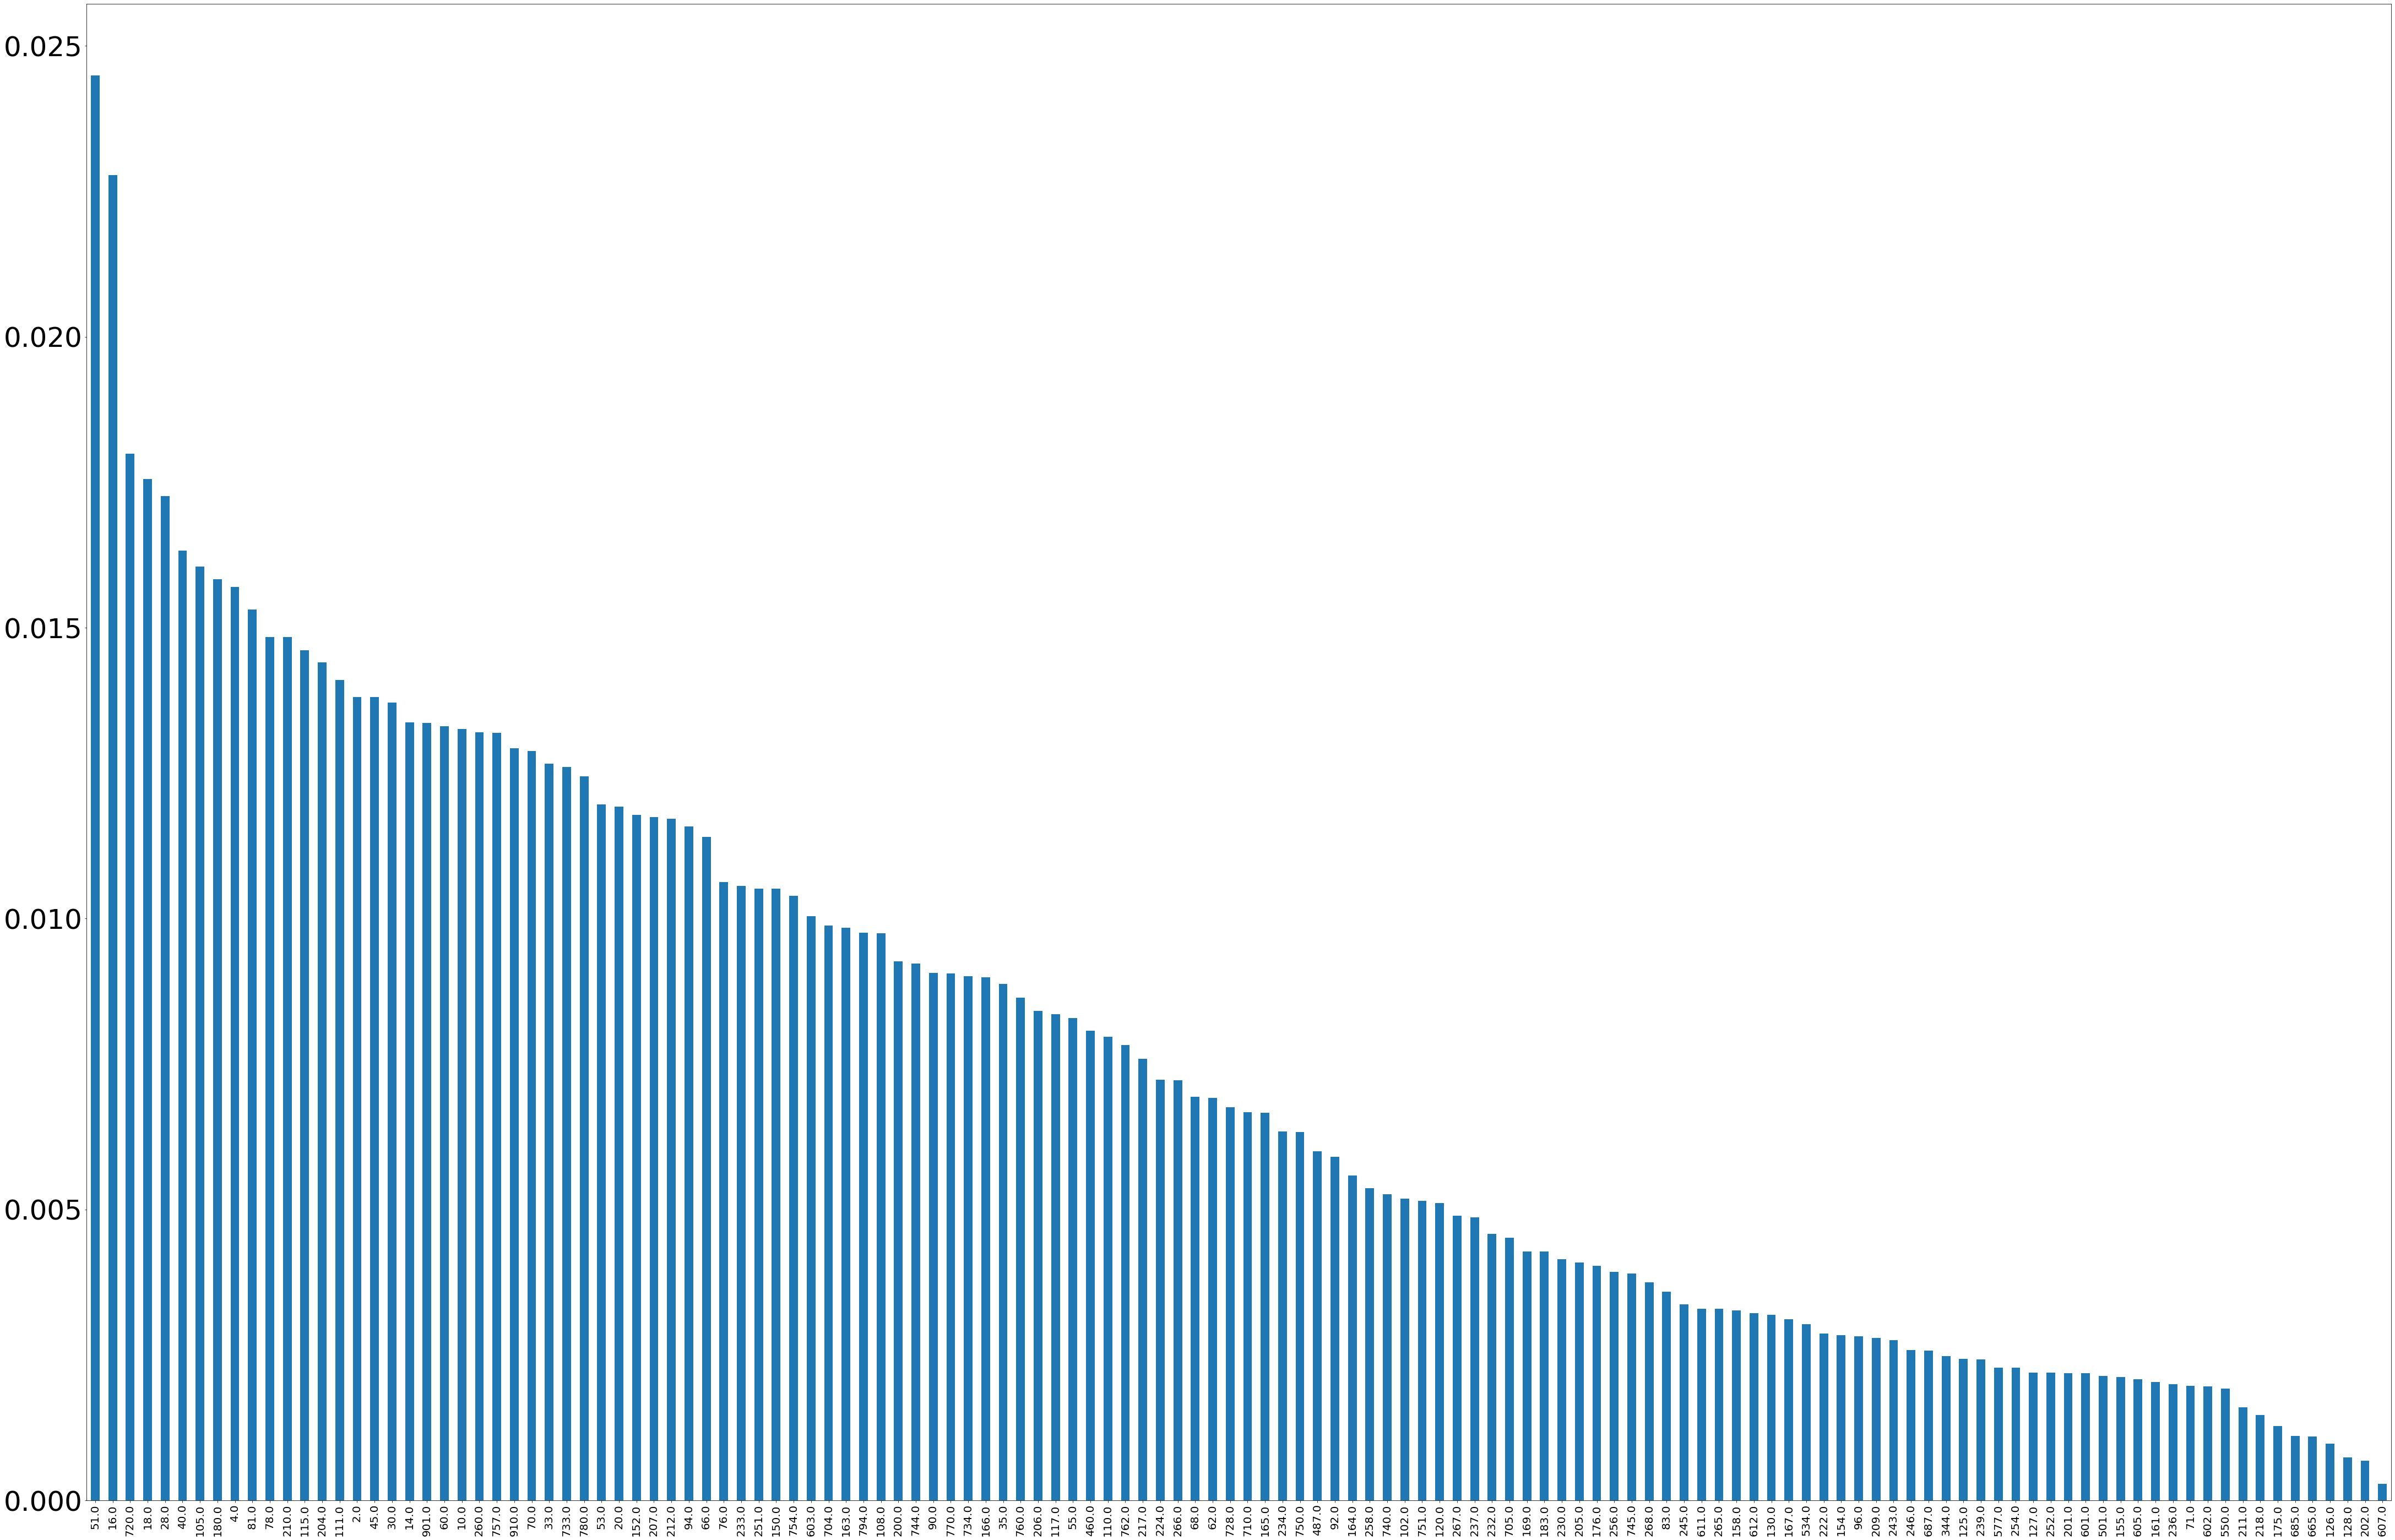

In [16]:
print(bus_friday_df["route"].value_counts())
print(bus_friday_df["route"].value_counts(normalize = True))
plt.figure(figsize=(75, 50))
plt.xticks(size = 20)
plt.yticks(size = 50)
bus_friday_df["route"].value_counts(normalize = True).plot.bar()

This is very interesting. I thought the most frequenet lines would be 901 (Orange - Chatsworth to NoHo) and 910 (Silver - El Monte to Downtown to San Pedro). Instead, it's 51 (Compton to Wilshire/Vermont), 16 (Downtown LA to Century City), and 720 (Wilshire/Vermont to Santa Monica). Also it's important to note is there is an extension for the purple line that will connect Wilshire/Vermont Station all the way to the VA. Thus, it is likely that the 720 (and 16 in parallel) will become obsolete since it follows this route which is likely what LA Metro wants. Although the 16 and 720 make sense, I have no idea why the 16 is so popular considering that Compton and Wilshire/Vermont are already connected by rail, but I suppose it's the people living along the route that are using it.

9     16481
10    15792
12    14714
17    12221
14    11946
13    11918
15    11525
8     10605
16    10114
11     7305
18     5116
Name: hour, dtype: int64


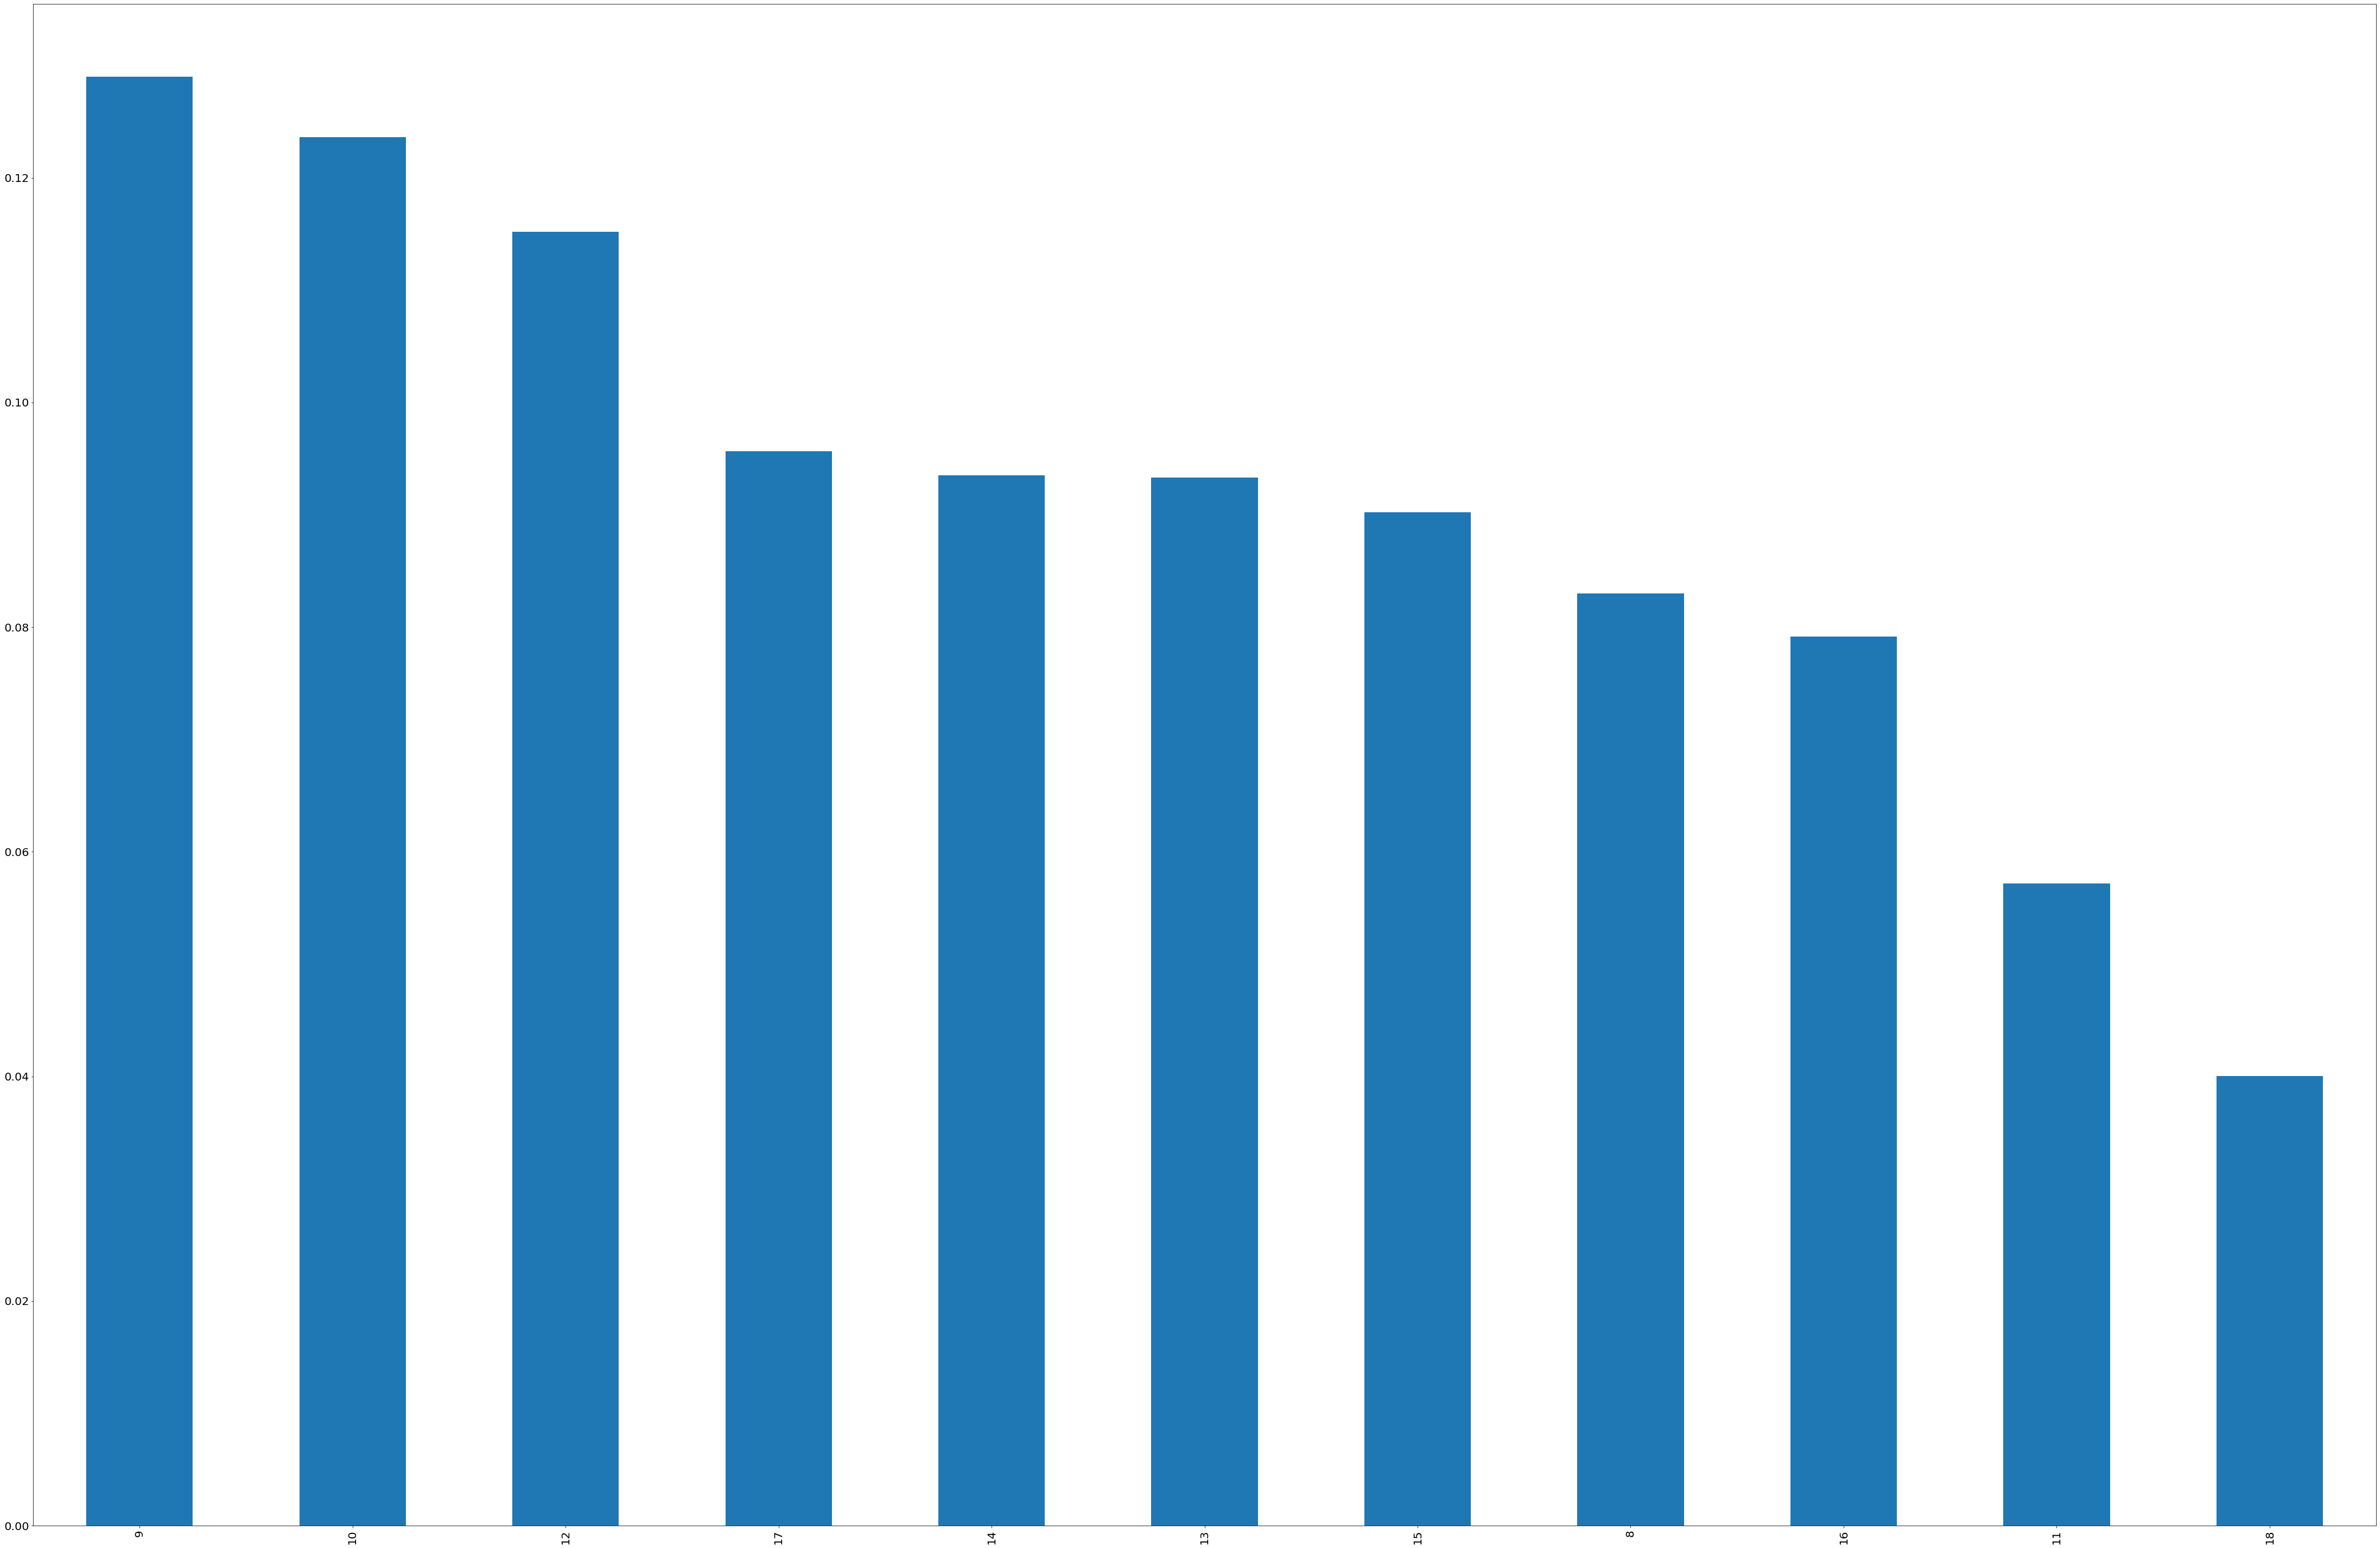

In [17]:
print(bus_friday_df["hour"].value_counts())
plt.figure(figsize=(75, 50))
plt.xticks(size = 20)
plt.yticks(size = 20)
bus_df["hour"].value_counts(normalize = True).plot.bar()

9am is the busiest time of the day

## Visualization
### Part 1 - LA Metro System Animation

Here I've created a function to create a folium map of Los Angeles

In [18]:
def create_LA_map ():
    la_map = folium.Map(location=[34.0522,-118.2437],
                                       zoom_start=10,
                                       tiles='CartoDB dark_matter')
    return la_map

create_LA_map()

In [26]:
def pick_color(direction):
    if direction == 'North':
        color = 'blue'
    elif direction == 'East':
        color = 'yellow'
    elif direction == 'South':
        color = 'red'
    elif direction == 'West':
        color = 'green'
    elif direction == 'Clockwis':
        color = 'white'
    elif direction == 'Xcounter':
        color = 'purple'
    else:
        color = 'pink'
    
    return color

In [27]:
def plot_bus(lat, lon, color, m):
    folium.CircleMarker(location = (lat, lon),
                        radius = 2,
                        fill = False,
                        weight = 1,
                        color = color
                       ).add_to(m)

In [30]:
def map_to_png(bus_temp_df, direction, day):
    dirPath = '../Images/Bus ' + day + ' ' + direction # + '/' + str(image_no) + '.png' #change day here
    print(dirPath)
    if not os.path.isdir(dirPath):
        print('The directory is not present. Creating a new one..')
        os.mkdir(dirPath)
    else:
        print('The directory is present.')
    
    all_directions = False
    if direction == "All":
        all_directions == True
    bus_map = create_LA_map()
    curr_time = bus_temp_df['grouped time'].iloc[0]
    image_no = 1
    total_count = 0
    subset_count = 0

    for index, bus in bus_temp_df.iterrows():
        total_count += 1
        if all_directions == True:
            color = pick_color(bus["direction"])
        else:
            if bus["direction"] == direction:
                subset_count += 1
                color = pick_color(bus["direction"])
            else:
                color = 'gray'
        if curr_time == bus["grouped time"]:
            plot_bus(bus["latitude"], bus["longitude"], color, bus_map)

        else:
            img_data = bus_map._to_png()
            img = Image.open(io.BytesIO(img_data))
            draw = ImageDraw.ImageDraw(img)
            font = ImageFont.truetype("../Roboto/Roboto-Light.ttf", 30)
            draw.text((20,img.height - 50), 
                      str(curr_time),
                      fill=(255, 255, 255),
                      font = font)
            draw.text((img.width - 400,20),
                       "Total: " + str(total_count) + '\n' + "Subset: " + str(subset_count),
                       fill = (255, 255, 255),
                      font = font)
            name = dirPath + '/' + str(image_no) + '.png' #change day here
            img.save(name)
            image_no += 1
            #break
            #reset the map
            bus_map = create_LA_map()
            #change the time
            curr_time = bus["grouped time"]
            #plot
            total_count = 1
            subset_count = 0
            if bus["direction"] == direction:
                subset_count += 1
                color = pick_color(bus["direction"])
            else:
                color = 'gray'
            plot_bus(bus["latitude"], bus["longitude"], color, bus_map)
    #print(count)
    return bus_map

In [31]:
direction = "South" #Change this value
day = "Friday"
bus_map = map_to_png(bus_friday_df, direction, day)
bus_map

../Images/Bus Friday South
The directory is present.


We will now convert all of the images to a gif

In [35]:
# filepaths
fp_in = "../Images/Bus " + day + ' ' + direction + "/*.png"
fp_out = "../Animations/Bus " + day + ' ' + direction + " Animation.gif"

# https://pillow.readthedocs.io/en/stable/handbook/image-file-formats.html#gif
img, *imgs = [Image.open(f) for f in natsorted(glob.glob(fp_in))]
img.save(fp=fp_out, format='GIF', append_images=imgs,
         save_all=True, duration=500, loop=0)

In [ ]:
# count = 1;
# for index, bus in bus_temp_df.iterrows():
#     color = pick_color_num(count)
#     bus_map = map_to_png(bus_temp_df, direction, day)
#     bus_map

In [243]:
# pop_routes = ["51", "16", "720", "18", "28"]
# bus_friday_df['route'] = bus_friday_df['route'].astype(str)

# top_5_index = bus_friday_df[bus_friday_df['route'] != pop_routes[0] | 
#                             bus_friday_df['route'] != pop_routes[1] |
#                             bus_friday_df['route'] != pop_routes[2] |
#                             bus_friday_df['route'] != pop_routes[3] |
#                             bus_friday_df['route'] != pop_routes[4]
#                            ].index
# len(top_5_index)

## Part 2: Heatmaps

Although the animation is neat, the data obtained had long intervals sets (around 3 minutes). Thus, the gif was not very smooth. So, let's try heat maps instead.

In [38]:
la_map = create_LA_map()
heat_data = [[row['latitude'],row['longitude']] for index, row in bus_friday_df.iterrows()]
HeatMap(heat_data).add_to(la_map)
la_map

There is so much information that it is mostly red. So, let's tone down the radius and look at specific hours.

In [39]:
def create_heat_map(complete_df, hour):
    df = complete_df.copy()
    la_map = folium.Map(location=[34.0522,-118.2437],
                                       zoom_start=10,
                                       tiles='CartoDB dark_matter')
    df.drop(df[df["hour"] != hour].index, inplace = True)
    heat_data = [[row['latitude'],row['longitude']] for index, row in df.iterrows()]
    HeatMap(heat_data, radius=15).add_to(la_map)
    return la_map

In [40]:
create_heat_map(bus_friday_df, 9)

In [41]:
create_heat_map(bus_friday_df, 11)

In [42]:
create_heat_map(bus_friday_df, 15)

In [43]:
create_heat_map(bus_friday_df, 17)

## Part 3: Time Heatmap

Here I will animate the heatmap for Friday (an ordinary day in LA)

In [270]:
def timed_heatmap(day):
    template_df = pd.DataFrame(columns = ['latitude', 'longitude'])
    heat_map_df = template_df

    image_no = 1
    total_count = 0

    curr_time = bus_friday_df['grouped time'].iloc[0]
    image_no = 1
    for index, bus in bus_friday_df.iterrows():
        if curr_time == bus['grouped time']:
            total_count += 1
            new_bus = {
                   'latitude' : bus['latitude'],
                   'longitude' : bus['longitude']
            }
            heat_map_df = heat_map_df.append(new_bus, ignore_index=True)
        else:
            print("cool")
            bus_map = create_LA_map()
            heat_data = [[row['latitude'],row['longitude']] for index, row in heat_map_df.iterrows()]
            HeatMap(heat_data, radius=15).add_to(bus_map)
            img_data = bus_map._to_png()
            img = Image.open(io.BytesIO(img_data))
            draw = ImageDraw.ImageDraw(img)
            font = ImageFont.truetype("../Roboto/Roboto-Light.ttf", 30)
            draw.text((20,img.height - 50), 
                      str(curr_time),
                      fill=(255, 255, 255),
                      font = font)
            draw.text((img.width - 400,20),
                       "Total: " + str(total_count),
                       fill = (255, 255, 255),
                      font = font)
            name = '../Images/Friday Heat Map/' + str(image_no) + '.png' #change day here
            img.save(name)
            image_no += 1
            total_count = 1
            curr_time = bus["grouped time"]
            heat_map_df = template_df
            

In [1]:
timed_heatmap("Friday")

In [275]:
# filepaths
fp_in = "../Images/Friday Heat Map/*.png"
fp_out = "../Animations/Friday Heat Map.gif"

# https://pillow.readthedocs.io/en/stable/handbook/image-file-formats.html#gif
img, *imgs = [Image.open(f) for f in natsorted(glob.glob(fp_in))]
img.save(fp=fp_out, format='GIF', append_images=imgs,
         save_all=True, duration=500, loop=0)

If you open the gif in the animations folder you will see that Downtown is the most red. To be honest I was surprised at how impacted DTLA was. This exemplifies DTLA's importance to the city of LA and LA county.